# Setup

First let's install and setup the necessary libraries.

First clone the github repository with the following command:

In [1]:
import os

!git clone https://github.com/ioannispartalas/CrossLingual-NLP-AMLD2020.git
#With this command, the path to the data is 
workdir = './CrossLingual-NLP-AMLD2020/'
os.environ["WORKDIR"] = workdir

#Please check if this correct, otherwise correct path_to_data
!printenv WORKDIR
!ls $WORKDIR/data/laser
!mkdir $WORKDIR/data/raw

Cloning into 'CrossLingual-NLP-AMLD2020'...
remote: Enumerating objects: 134, done.
remote: Counting objects: 100% (134/134), done.
remote: Compressing objects: 100% (121/121), done.
remote: Total 465 (delta 83), reused 29 (delta 13), pack-reused 331
Receiving objects: 100% (465/465), 63.94 MiB | 12.03 MiB/s, done.
Resolving deltas: 100% (260/260), done.
./CrossLingual-NLP-AMLD2020/
ar_laser_test.npy	  es_laser_test.npy	    ru_laser_test.npy
ar_laser_train.npy	  es_laser_train.npy	    ru_laser_train.npy
ar_test_labels_adan.txt   es_test_labels_adan.txt   ru_test_labels_adan.txt
ar_train_labels_adan.txt  es_train_labels_adan.txt  ru_train_labels_adan.txt
en_laser_test.npy	  nl_laser_test.npy	    tr_laser_test.npy
en_laser_train.npy	  nl_laser_train.npy	    tr_laser_train.npy
en_test_labels_adan.txt   nl_test_labels_adan.txt   tr_test_labels_adan.txt
en_train_labels_adan.txt  nl_train_labels_adan.txt  tr_train_labels_adan.txt


Download data from on your local file system and upload it to colab fs with the cell below

In [0]:
# from google.colab import files
# uploaded = files.upload()
# !tar -jxf *.bz2 -C  $WORKDIR/data/raw/
# !rm ./semeveal15_sentiment_datasets.tar.bz2

In [0]:
# TY_COMMENT
# above cell does not work with safari.
# either switch to chrome 
# or upload the gz2 file using "upload" button on the side bar 
# then do the following:

!tar -jxf *.bz2 -C  $WORKDIR/data/raw/
!rm ./semeveal15_sentiment_datasets.tar.bz2

In [4]:
# Make sure you have all the semeval files 
!ls $WORKDIR/data/raw

semeval15.en.test.csv	semeval15.es.train.csv	semeval15.ru.test.csv
semeval15.en.train.csv	semeval15.nl.test.csv	semeval15.ru.train.csv
semeval15.es.test.csv	semeval15.nl.train.csv


Install LASER and conceptNet.  **This might take a 
while**




In [5]:
%cd CrossLingual-NLP-AMLD2020/
!bash install_laser.sh
!bash download_conceptNet.sh

/content/CrossLingual-NLP-AMLD2020
Checking out github repo
/root/projects
Cloning into 'LASER'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 756 (delta 2), reused 2 (delta 0), pack-reused 748
Receiving objects: 100% (756/756), 2.77 MiB | 2.23 MiB/s, done.
Resolving deltas: 100% (281/281), done.
     |████████████████████████████████| 51kB 1.7MB/s 
 - creating directory /root/projects/LASER/models
 - bilstm.eparl21.2018-11-19.pt
 - eparl21.fcodes
 - eparl21.fvocab
 - bilstm.93langs.2018-12-26.pt
 - 93langs.fcodes
 - 93langs.fvocab
Installing external tools
 - creating directory /root/projects/LASER/tools-external/moses-tokenizer/tokenizer
 - download tokenizer/tokenizer.perl
 - download tokenizer/detokenizer.perl
 - download tokenizer/normalize-punctuation.perl
 - download tokenizer/remove-non-printing-char.perl
 - download tokenizer/deescape-special-chars.perl
 - download tokenizer/lowe

Restart the runtime  environnement.

In [0]:
import os
os.kill(os.getpid(), 9)

Set  environnement variables and load modules

In [0]:
import sys
import os
import importlib

os.environ.setdefault("LASER","/root/projects/LASER/")
assert os.environ.get('LASER'), 'Please set the environement variable LASER'
LASER = os.environ['LASER']
sys.path.append(LASER + 'source/lib')
sys.path.append(LASER+"source/")

workdir = './CrossLingual-NLP-AMLD2020/'
os.environ["WORKDIR"] = workdir
sys.path.insert(1, workdir)

from src.models import *

In [2]:
!printenv WORKDIR
!printenv LASER

./CrossLingual-NLP-AMLD2020/
/root/projects/LASER/


If everything went well the following should not print any errors.

In [3]:
import sys
sys.path.append("..")
from src.models import *

print(Doc2Laser.__doc__)

Transform raw documents to their LASER representations.
    
    Parameters:
    -------------
    lang: string, the language to encode
    cpu: boolean, whether to use cpu of gpu
    


Yay!

# Introduction to Language Representation and Text Classification

## Language is hard! 

Take a look at the following sentences: 
1. Jane went to the store
2. went the to Jane store 
3. Jane went store 
4. Jane goed store 

They (try to) express similar meanings, but some feel un-natural!  

Several things to handle: 
- Morphology
- Syntax <- touch on this 
- Semantics/World Knowledge <- touch on this but mostly shallow semantics
- Discourse 
- Pragmatics 
- Multilinguality <- focus on this



## Sentiment Classification
- A type of Text Classification task.
- binary (positive, negative)
- ternary (positive, neutral, negative)
- ordinal (image below!)

<img src="https://github.com/ioannispartalas/CrossLingual-NLP-AMLD2020/blob/master/data/images/sentiment-5class.png?raw=1" width="600">

*Input* (x): a text span 

*Output* (y): a class/category (sentiment polarity in the sentiment classification example)

**Goal**: Train a function $f(x) \rightarrow y$

- How to represent text? 
- What functions can we use for the task? 
- How to evaluate performance?



## Machine Learning workflow
1. Get data
1. Inspect the data
1. Preprocess/Clean/Normalize the data
1. Vector Representation
1. Modeling 
1. Evaluation

<img src="https://github.com/ioannispartalas/CrossLingual-NLP-AMLD2020/blob/master/data/images/pipeline.png?raw=1" width="600">




## Text representation: Bag-of-Words and TF/IDF weiging

Given a text, extract the vocabulary, build a vector of dim $|V|$, non-zeros are words that appear. 
<img src="https://github.com/ioannispartalas/CrossLingual-NLP-AMLD2020/blob/master/data/images/textVectorization.png?raw=1" width="600">

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['This is the first document.',
'This document is the second document.',
'And this is the third one.',
'Is this the first document?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.toarray())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]



- Words are identified by their ids
- Non-zero means a word occurs
- The value, is the number of times the word occurs in a sentence

In [5]:
vectorizer.transform(['This is the first document', 'is document the first this']).toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

- order does not matter! Recall the example with Jane ;-)
- words like 'and, the' matter the same with words like 'super, great, ..'. This is a limitation. 
- tf-idf (term frequence, inverse document frequency) is an heuristic that can get us far!

$tf_{i,j}\times\log\frac{N}{df_i}$

where

$tf_{i,j}$ is number of times the term $i$ appears in document $j$, $df_i$ is the document frequency in the full collection of documents and $N$ is the number of available documents.

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = ['This is the first document.',
'This document is the second document.',
'And this is the third one.',
'Is this the first document?']

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.toarray())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.53864762
  0.28108867 0.         0.28108867]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]


## Beyond single words: N-grams and Character-grams

Other tricks and tips: 
- Recall text is a sequence of symbols. We may care for characters instead of words (think typos) 
- We may care for longer sequences that single words: New York, not great, .. 

In [7]:
# Character grams

vectorizer = CountVectorizer(analyzer='char', ngram_range=(1,1)) # This creates character-grams of size 1
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.toarray())

[' ', '.', '?', 'a', 'c', 'd', 'e', 'f', 'h', 'i', 'm', 'n', 'o', 'r', 's', 't', 'u']
[[4 1 0 0 1 1 2 1 2 3 1 1 1 1 3 4 1]
 [5 1 0 0 3 3 4 0 2 2 2 3 3 0 3 4 2]
 [5 1 0 1 0 2 2 0 3 3 0 2 1 1 2 3 0]
 [4 0 1 0 1 1 2 1 2 3 1 1 1 1 3 4 1]]


N-grams are sequences of *objects*. Here, objects, are either charactets sequences or word sequences. For character sequences for example:

<img src="https://github.com/ioannispartalas/CrossLingual-NLP-AMLD2020/blob/master/data/images/ngrams.png?raw=1">

In this figure notice the sliding window of size 3. While moving from left to right, it generates the possible sequences that will be used to populate the vector representations. Due to the fact that the window is of size 3, the method will generate character 3-grams. If, instead of character in the figure, we were using words, we would be generating word 3-grams. 

**Question**: can you think of a limitation of word 3-grams, 4-grams, 5-grams etc.?

**Exercise**: how to get these sequences in Python (in an elegant way)?

In [8]:
# N-grams (can be either char-grams or word-grams)
vectorizer = CountVectorizer(analyzer='char', ngram_range=(2,3)) # This creates character-grams of sizes 2 and 3
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.toarray())

[' d', ' do', ' f', ' fi', ' i', ' is', ' o', ' on', ' s', ' se', ' t', ' th', 'an', 'and', 'co', 'con', 'cu', 'cum', 'd ', 'd d', 'd o', 'd t', 'do', 'doc', 'e ', 'e f', 'e s', 'e t', 'e.', 'ec', 'eco', 'en', 'ent', 'fi', 'fir', 'he', 'he ', 'hi', 'hir', 'his', 'ir', 'ird', 'irs', 'is', 'is ', 'me', 'men', 'nd', 'nd ', 'ne', 'ne.', 'nt', 'nt ', 'nt.', 'nt?', 'oc', 'ocu', 'on', 'ond', 'one', 'rd', 'rd ', 'rs', 'rst', 's ', 's d', 's i', 's t', 'se', 'sec', 'st', 'st ', 't ', 't d', 't i', 't.', 't?', 'th', 'the', 'thi', 'um', 'ume']
[[1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1
  1 1 0 1 1 0 1 2 2 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 2 0 1 1 0 0 1 1
  1 1 0 1 0 2 1 1 1 1]
 [2 2 0 0 1 1 0 0 1 1 1 1 0 0 1 1 2 2 1 1 0 0 2 2 1 0 1 0 0 1 1 2 2 0 0 1
  1 1 0 1 0 0 0 2 2 2 2 1 1 0 0 2 1 1 0 2 2 1 1 0 0 0 0 0 2 1 0 1 1 1 0 0
  1 0 1 1 0 2 1 1 2 2]
 [0 0 0 0 1 1 1 1 0 0 3 3 1 1 0 0 0 0 2 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1
  1 2 1 1 1 1 0 2 2 0 0 1 1 1 1 0 0 0 0 0 0 1

# Dense Representations

All of the above techniques have a common limitation. The do not encode semantics! 
This means that the vector for `amazing` is completely disimilar from the vector of `great` and the of vector `Laussane`. 
Can we do better?
The answer is yes! Enter, word embeddings. 
Dense word representation, that can encode the meaning! 

<img src="https://github.com/ioannispartalas/CrossLingual-NLP-AMLD2020/blob/master/data/images/word2vec.png?raw=1" width="600">

In [0]:
import numpy as np
from sklearn.manifold import TSNE

# For more information of TSNE: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
# For more information on GloVe: https://nlp.stanford.edu/projects/glove/

#vectors = open('../data/glove_excerpt.txt').read().strip().split('\n')
vectors = open(workdir + '/data/glove_excerpt.txt').read().strip().split('\n')
vectors = {line.split()[0]:np.array(line.split()[1:]).astype(float) for line in vectors}

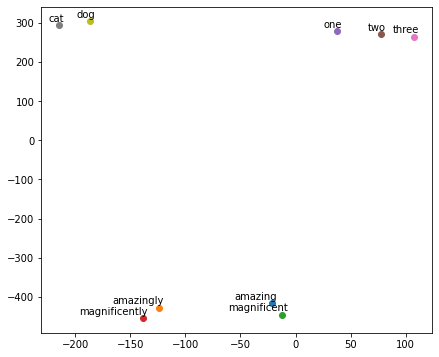

In [10]:
import matplotlib.pyplot as plt
# Let's visualize this, using TSNE, a methods that can reduce the dimensionality of the vectors
labels = list(vectors.keys())
tokens = list(vectors.values())

tsne_model = TSNE(perplexity=1.5, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(tokens)

x = new_values[:,0]
y = new_values[:,1]

plt.figure(figsize=(7, 6)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')


This is a great result for several reasons:
- families of similar words are close between them
- Some of them encode some syntax (magnificent and amazing) need similar vectors to approach their adverbs! 

## Learning Representations with Deep-NN Models

More recently the introduction of deep neural models for building text representations provided us with capabilities of better language understading and subsequently solve easier text related tasks. Specifically, we can distinguish the so-called Transformers in three different classes with respect to the objective they optimize for: 

- Language Model: estimate the probability of a word given previous words.
- Machine Translation: in a sequence mode predict the words in the target sentence.
- Masked Language Model: predict the masked token.

<img src="https://github.com/ioannispartalas/CrossLingual-NLP-AMLD2020/blob/master/data/images/lm_models.png?raw=1">

# An Introduction to Cross-Lingual Embeddings


Thus far we dealt with embeddings created from English corpus (mono-lingual embedding).

In this section we introduce **Cross-Lingual Embedding** which **jointly create ONE embedding for multiple languages**.

What this means? It means that **similar words(or sentence, documents) regardless of the language, have similar vector representation**.

There are a lot of useful tasks you can do with this, like grouping (or clustering) words from different language by their meanings.


## Cross-Lingual Word Embedding 

Let's first see see how this work for **Word Embedding**.

We will use a pre-trained **ConceptNet** multilingual embeddings for English and French. 

In [11]:
import sys
sys.path.append('..')
from src.utils import load_embeddings,emb2numpy
from IPython.display import Image
import numpy as np
from umap import UMAP
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Create lists of example English and French words

english_words = ["room","hotel","towel","book","coffee","chair","glass","pen","shoe","two","amazing"]
french_words = ["hôtel","chambre","livre","café","chaise","serviette","verre","stylo","chaussure","deux","fantastique"]

In [20]:
# Load pre-trained embedding. This may take a time

en_emb = load_embeddings(path=workdir + "concept_net_1706.300.en", dimension=300,skip_header=False,vocab=english_words)
fr_emb = load_embeddings(path=workdir + "concept_net_1706.300.fr", dimension=300,skip_header=False,vocab=french_words)

Loaded 11 vectors
Loaded 11 vectors


In [0]:
# Put the vectors in arrays for processing

words_en,V_en = emb2numpy(en_emb)
words_fr,V_fr = emb2numpy(fr_emb)

In [0]:
vectors = np.concatenate((V_en,V_fr))
all_words  = words_en+words_fr

In [0]:
# We project the 300d vectors to a 2d space for visualization
V_umap = UMAP(n_neighbors=3,min_dist=0.6).fit_transform(vectors)


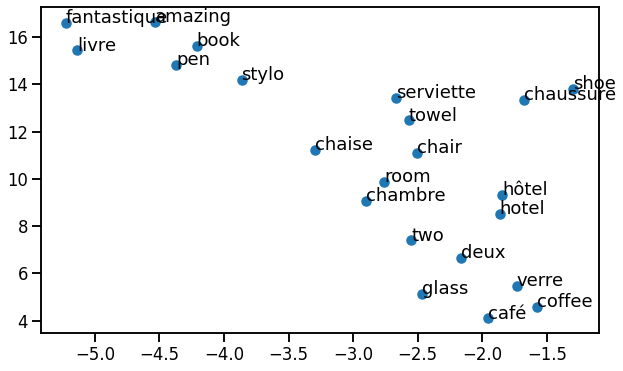

In [24]:
sns.set_context("talk")

fig= plt.figure(figsize=(10,6))

plt.scatter(V_umap[:, 0], V_umap[:, 1])
for i, word in enumerate(all_words):
    plt.annotate(word, xy=(V_umap[i, 0], V_umap[i, 1]))
plt.show()

Observe that **the words from the different languages but similar meanings are clustered** in the embedding projection. This means that this embedding somehow learned that words' semantic meanings across languages.

## How word embeddings are created

So this looks a bit like a magic. How do we create such embeddings? 

---

There are more than one way to create cross-lingual embedding; one of a fairly simple but effective way is to learn **projection (or alignment) function between the languages** with **supervised training**:


---

1. Train word embeddings separately.
2. Create some sort of supervised training data using some aligned corpus (for example, bilingual dictionary).
3. Train an alignment function that projects the vectors to a common space.


![](https://github.com/ioannispartalas/CrossLingual-NLP-AMLD2020/blob/master/data/images/alignment.png?raw=1)

 
---

For the case of ConceptNet, projection function is a simple **linear projection function that minimize the vector distance between the two words with the same meaning**: 

* First create word pairs using the dictionary. There are as many (X, Y) pair as there are words in the dictionary.

* Then find the coefficient W which yields smallest total distance for all the pair.

![](https://github.com/ioannispartalas/CrossLingual-NLP-AMLD2020/blob/master/data/images/bilingual_alignement.png?raw=1)



---


A few comments:

* Type of alignment function, and type of supervision are active area of research. 
* Type of supervision can vary from parallel sentences (for example, parallel translation) to much cheaper signals like bilingual dictionaries.
* Other recent methods do not require any seed dictionaries and induce in an iterative procedure one that is used to learn the projections. 

For a comprehensive study one can refer to [ Ruder et al., A Survey Of Cross-lingual Word Embedding Models](https://arxiv.org/abs/1706.04902)

Any question? 

## Cross-Lingual Sentence Embeddings

* Word embedding is cool, but it's a bit unsettling
* It ignores **word order**, but we know that order of words could change meanings. 
* It does not consider that **words change their meanings** depends on the contexts
* In short, they could miss salient information as they neglect **linguistic dependencies**. 



### LASER Sequence Encoder

* Can we create embeddings for **ordered sequence of words**? such as sentence or document.

* Some type of NN models, like LSTM (a type of RNN) or models with attention, has been widely used for prediction over sequencial data. They turned out to be good models for Embedding as well (ELMO, BERT) 

* In recent year Facebook AI released a **multi-lingual sentence encoder** trained over sentences from 93 languages. [LASER](https://github.com/facebookresearch/LASER) (Language-Agnostic Sentence Representations) 

* What this means? Now we can create **dense vector representation of any sentence in any (of 93) languages in common embedding space, with one encoder**


## How sentence encoders are trained

**Caveat:** Cross-lingual training is in general very labor intensive. It requires substantial parallel corpora (LASER used over 223 million parallel sentences) and resource (LASER took over 5 days). Luckily, many of pre-trained embeddings are open source and readily available.

As a ML practioner you would not often train one from scratch. 

Here is how it work in a nutshell.

This schematic graph of LASER taken from its publication from TACL 2017 

* This is a Deep Recurrent Neural Network.
* It consistes of **2 chambers**, one for **encoding**, on the left and the other for **decoding**, on the right. 
* Inputs (say English sentence), bottom left, goes first into the a layer of Byte pair encoder (BPE - its kind of very sophisticated tokenizer) then fed into 5 layers of Bi-directional LSTM (BiLSTM), then aggregated at the top to fit into a fixed size encodeing. 
* The encoded sentences then fed into the decoder where the output sentence (French, for example) are generated one token at a time. (note that a part of the input to the decoder is the output from the previous position) 
* Note that there is horizontal arrows linking token as well as the vertical arrow to the next network layer. 
* Once model is fully trained, the Encoder (and max-pulling step) are used for sentence embedding purpose.
 
![](https://github.com/ioannispartalas/CrossLingual-NLP-AMLD2020/blob/master/data/images/laser.png?raw=1)

This neural network is rather complicated function, but in a split it's doing kind of same things as the cross-lingual word embedding. 

There, embedding was created by learning a projection function which minimize the distance between the words of same meaning.

Here, embedding is created by learning a generation function which generate a text of same meaning; and instead of dictionary, it used aligned sentences for training. 

## Hands-on experiment: clustering sentences

Let's use LASER and see how well can embed a few parallel sentences in English, French and Greek. For this, we will use the Doc2Laser class.

In [0]:
import sys
sys.path.append("..")
from src.models import *

In [26]:
print(Doc2Laser.__doc__)

Transform raw documents to their LASER representations.
    
    Parameters:
    -------------
    lang: string, the language to encode
    cpu: boolean, whether to use cpu of gpu
    


In [27]:
# English
en_sentences = ["This is a nice hotel.",
                "The bathroom was clean",
                "The dog is brown",
                "I will call you",
               "Not very far from the center"]

# define a transformer -- put cpu=False to turn on GPU option. Goes faster
doc2laser_transformer = Doc2Laser("en")

# Get the representation of the sentences
X_en = doc2laser_transformer.transform(en_sentences)

 - Encoder: loading /root/projects/LASER/models/bilstm.93langs.2018-12-26.pt
 - Tokenizer: temp_in_docs.txt in language en  
 - fast BPE: processing tok
 - Encoder: bpe to out.raw
 - Encoder: 5 sentences in 0s


In [28]:
# French
fr_sentences = ["Celui-ci était un hôtel magnifique",
                "La salle de bain était propre",
                "Le chien est brun",
                "Je t'appelle",
               "Pas très loin du centre"]

# Change the language in the transformer
doc2laser_transformer.set_params(lang="fr")
X_fr = doc2laser_transformer.transform(fr_sentences)

 - Encoder: loading /root/projects/LASER/models/bilstm.93langs.2018-12-26.pt
 - Tokenizer: temp_in_docs.txt in language fr  
 - fast BPE: processing tok
 - Encoder: bpe to out.raw
 - Encoder: 5 sentences in 0s


/pytorch/aten/src/ATen/native/RangeFactories.cpp:195: UserWarning: The number of elements in the out tensor of shape [7] is 7 which does not match the computed number of elements 9. Note that this may occur as a result of rounding error. The out tensor will be resized to a tensor of shape (9,).


In [29]:
# Greece

gr_sentences = ["Το ξενοδοχείο ήταν υπέροχο",
                "Η τουαλέτα ήταν καθαρή",
                "Ο σκύλος είναι καφέ",
                "Σε παίρνω τηλέφωνο",
                "Όχι πολύ μακριά από το κέντρο"]
# Change the language in the transformer
doc2laser_transformer.set_params(lang="el", cpu=False)
X_gr = doc2laser_transformer.transform(gr_sentences)

 - Encoder: loading /root/projects/LASER/models/bilstm.93langs.2018-12-26.pt
 - Tokenizer: temp_in_docs.txt in language el  
 - fast BPE: processing tok
 - Encoder: bpe to out.raw
 - Encoder: 5 sentences in 0s


/pytorch/aten/src/ATen/native/RangeFactories.cpp:195: UserWarning: The number of elements in the out tensor of shape [9] is 9 which does not match the computed number of elements 10. Note that this may occur as a result of rounding error. The out tensor will be resized to a tensor of shape (10,).


Let's project the sentence representations now in a 2d space and check if the parallel sentences in the three languages are close.

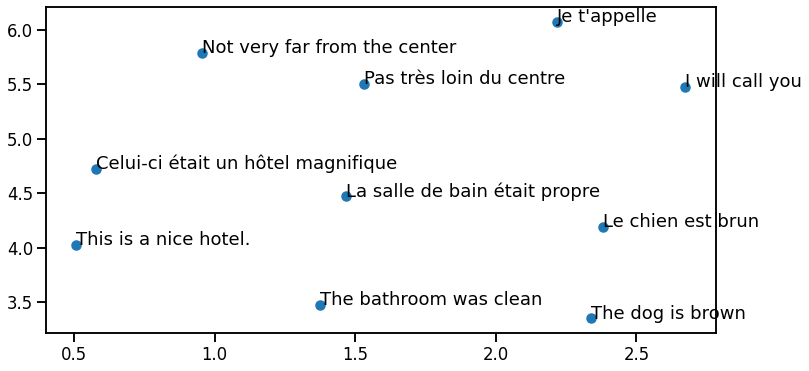

In [30]:
V_umap = UMAP(n_neighbors=5,min_dist=0.2).fit_transform(np.concatenate((X_en,X_fr)))

fig= plt.figure(figsize=(12,6))

plt.scatter(V_umap[:, 0], V_umap[:, 1])
for i, word in enumerate(en_sentences+fr_sentences):
    plt.annotate(word, xy=(V_umap[i, 0], V_umap[i, 1]))
plt.show()

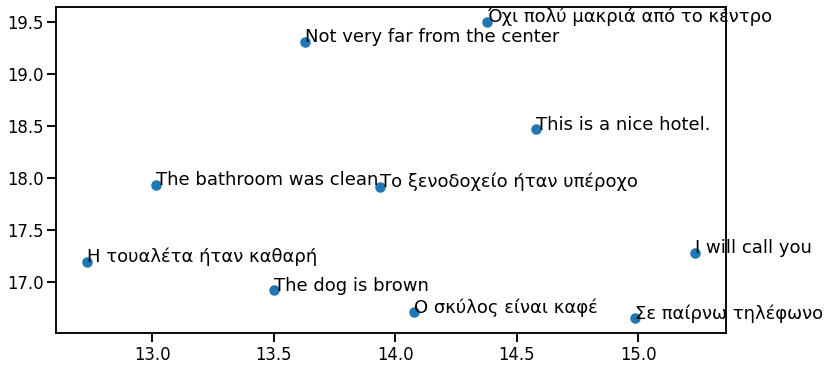

In [31]:
V_umap = UMAP(n_neighbors=5,min_dist=0.2).fit_transform(np.concatenate((X_en,X_gr)))

fig= plt.figure(figsize=(12,6))

plt.scatter(V_umap[:, 0], V_umap[:, 1])
for i, word in enumerate(en_sentences+gr_sentences):
    plt.annotate(word, xy=(V_umap[i, 0], V_umap[i, 1]))
plt.show()

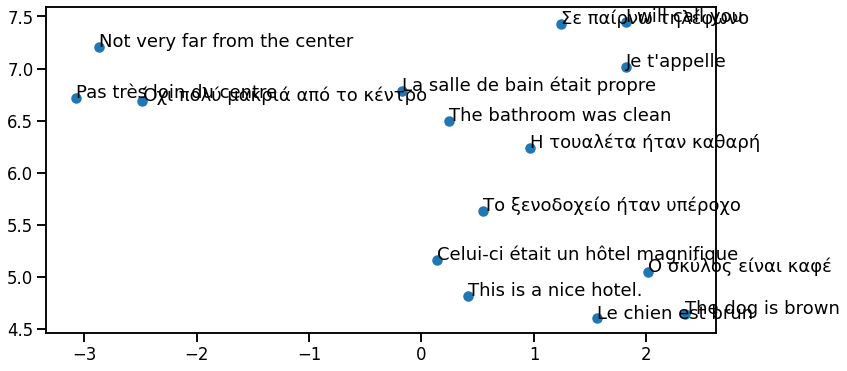

In [32]:
V_umap = UMAP(n_neighbors=5,min_dist=0.2).fit_transform(np.concatenate((X_en,X_fr,X_gr)))

fig= plt.figure(figsize=(12,6))

#plt.scatter(V_umap[:, 0], V_umap[:, 1])
plt.scatter(V_umap[:, 0], V_umap[:, 1])
for i, word in enumerate(en_sentences+fr_sentences+gr_sentences):
    plt.annotate(word, xy=(V_umap[i, 0], V_umap[i, 1]))
plt.show()

We can observe that the parallel sentences are close to the embedding space which means that the model can capture the semantic in a single latent multi-lingual space. 

***Exercise:*** Try to add few more parallel sentence in other languages and project them with the same way.

In [0]:
def map_words(en_sentences, gr_sentences, language):

  doc2laser_transformer = Doc2Laser("en")
  X_en = doc2laser_transformer.transform(en_sentences)
  
  doc2laser_transformer = Doc2Laser(language)
  X_gr = doc2laser_transformer.transform(gr_sentences)

  V_umap = UMAP(n_neighbors=5,min_dist=0.2).fit_transform(np.concatenate((X_en,X_gr)))
  fig= plt.figure(figsize=(12,6))

  plt.scatter(V_umap[:, 0], V_umap[:, 1])
  for i, word in enumerate(en_sentences + gr_sentences):
    plt.annotate(word, xy=(V_umap[i, 0], V_umap[i, 1]))
  plt.show()

 - Encoder: loading /root/projects/LASER/models/bilstm.93langs.2018-12-26.pt
 - Tokenizer: temp_in_docs.txt in language en  
 - fast BPE: processing tok
 - Encoder: bpe to out.raw
 - Encoder: 5 sentences in 0s
 - Encoder: loading /root/projects/LASER/models/bilstm.93langs.2018-12-26.pt
 - Tokenizer: temp_in_docs.txt in language el  
 - fast BPE: processing tok
 - Encoder: bpe to out.raw
 - Encoder: 5 sentences in 0s


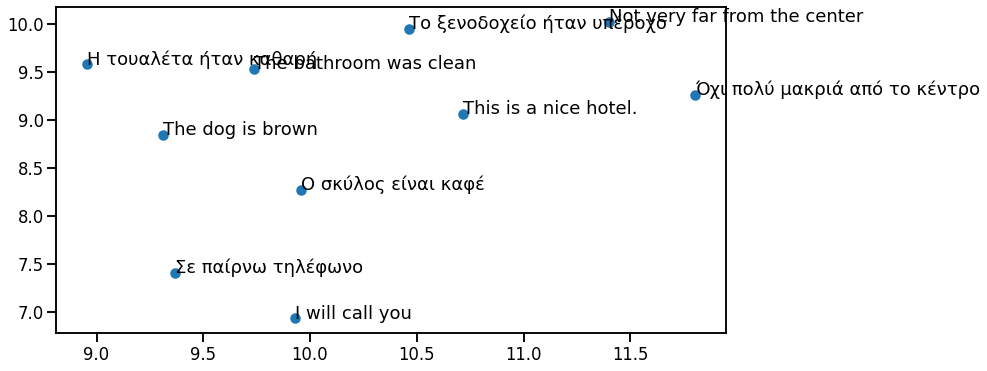

In [34]:
en_sents = ["This is a nice hotel.",
                "The bathroom was clean",
                "The dog is brown",
                "I will call you",
               "Not very far from the center"]
gr_sents = ["Το ξενοδοχείο ήταν υπέροχο",
                "Η τουαλέτα ήταν καθαρή",
                "Ο σκύλος είναι καφέ",
                "Σε παίρνω τηλέφωνο",
                "Όχι πολύ μακριά από το κέντρο"]
lang = "el"
map_words(en_sents, gr_sents, lang)

# Cross-lingual Document Classification

One of the best uses of Cross-lingual Embedding is for performing so-called **Transfer Learning** across different languages:

- In practical NLP tasks, you often have very limited access to training data in your target languages, even when there are plenty of data in other language (English, for example).

- Multi-lingual embedding is used as a mean for transferring knowledge from one language to another 

- By encoding the data using Multi-lingual embedding we can use resource-rich languages to train models then directly apply them to resource-deprived languages.

- Two types of transfer learning we cover in this workshop: **Zero-shot Learning** and **Few-shot Learning**


## Hands-on experiment: Zero-shot Learning 

Zero-shot learning is applicable when:

- **You have labeled training documents in one language (source documents)** 
- **You have no training data in the language in which you wish to classify documents (target documents)**

In the following demo, we will do this looking impossible task by training a **Cross-Lingual Sentiment Classifiers** via Zero-shot transfer learning. This is pretty simple two steps:

* Encode the training text with (some) Cross-lingual embedding 
* Train a classifier with encoded training data
* Encode the test text with the same embedding then run prediction.

Let's start.


---




### Sentiment Classification revisited.

Recall that Sentiment Classification is: 

- A type of Text Classification task
- Input (x): a text span
- Output (y): a category ("Positive" or "Negative")
- ML Goal: Train a function that classify input to the correct sentiment  𝑓(𝑥)→𝑦 

For the sake for experiment, let's say **we want a model to classify Spanish** documents, but **have only English training data.**



---


We start with loading data set from the [SemEval](http://alt.qcri.org/semeval2015/) Sentiment Analysis Workshop, **training data in English**, and **test data in Spanish.** 

In [0]:
import pandas as pd
from sklearn.metrics import accuracy_score,f1_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y
from sklearn.utils.multiclass import unique_labels
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from prettytable import PrettyTable

import sys
sys.path.append("..")

from collections import Counter
from src.models import *
from src.utils import *
from src.dataset import *


In [36]:
# dataset = Dataset("../data/raw/","en", "es")
dataset = Dataset(workdir + "data/raw/","en", "es")

dataset.load_data()
#To check the arguments of the function
#print(dataset.load_cl_embeddings.__doc__)
dataset.load_cl_embeddings(workdir,300,False)



Training data
Training Data Shape:  (1635, 2)
Class distribution:  {'positive': 1114, 'negative': 521}

Training data
Training Data Shape:  (644, 2)
Class distribution:  {'positive': 455, 'negative': 189}
Loaded 3315 vectors
Loaded 1287 vectors


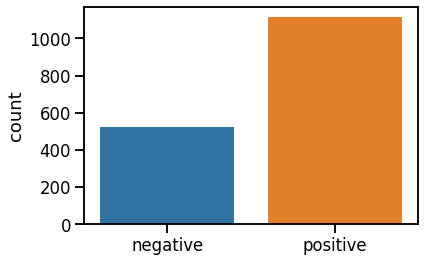

In [37]:
# Plot the counts on the classes for the source language
sns.countplot(dataset.y_train,order=["negative","positive"])

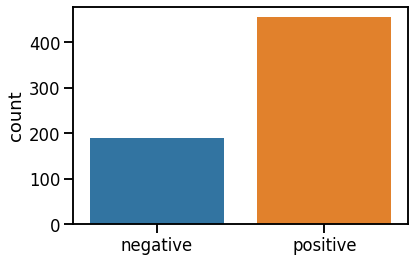

In [38]:
# And for the Spanish dataset
sns.countplot(dataset.y_test,order=["negative","positive"])

Observe that the datasets are unbalanced as we have much more positive comments that negative ones. 


---


Next, we establish **two baselines**. First one is a simple **majority win** (also called "dummy classification").

In [39]:
# Let's keep the scores of all the expriments in a table
x = PrettyTable()

x.field_names = ["Model", "f-score"]

# Majority Class
pipeline = Pipeline([('vectorizer', CountVectorizer()), 
                     ('classifier', DummyClassifier("stratified"))])
runner = Runner(pipeline, dataset)
score = runner.eval_system()
x.add_row(["Dummy", format_score(score)])
print(x)

+-------+---------+
| Model | f-score |
+-------+---------+
| Dummy |  70.42  |
+-------+---------+


Second baseline is a **Logistic Regression with unigram count features**. 

Note that training data are in English, so quite a few features are absent in the test (Spanish) data. So this is quite a naive approach. 

That said, We expect that in cases the  languages share a part of the vocabulary (for example in Latin languages) this approach can potentially give descent results. 


In [40]:
# Logistic Regression on words
pipeline = Pipeline([('vectorizer', CountVectorizer(lowercase=True)), 
                     ('classifier', LogisticRegression(solver="lbfgs"))])
runner = Runner(pipeline, dataset)
score = runner.eval_system()
x.add_row(["LR unigrams",format_score(score)])
print(x)

+-------------+---------+
|    Model    | f-score |
+-------------+---------+
|    Dummy    |  70.42  |
| LR unigrams |  83.91  |
+-------------+---------+


Not too bad considering this approach basically oblivious to the language difference.

We used unigrams for this exercise, but more involved n-gram features (bigram, trigram, and character-gram) can be tried (see Exercise) Character-gram in particular may improve the score.



---

Let's now use **cross-lingual word embeddings** to create a **cross-lingual classifier** with zero-shot fashion, and see if it come out better.

Since the embedding is at word level, we need some way to create a vector representation from the words in the document. Here is one simple (but effective) approach: 

In the diagram below, the original document is represented as a binary vector with 3 words. 

1. Convert the document in 1-hot encoding
2. Multiplied the vector with the embedding matrix of size $V\times d$, pulling out the 3 vectors of size $d$. 
3. Aggregate then average vectors

![](https://github.com/ioannispartalas/CrossLingual-NLP-AMLD2020/blob/master/data/images/vec_average.png?raw=1)


---

We repeat this operation for each document. We then train a Logistic Regression on the training set (English) and evaluate on the test set (Spanish).


In [0]:
for name, myclf in zip(['Knn-nBow', 'LR-nBow'],[KNeighborsClassifier(n_neighbors=2), LogisticRegression(C=10, solver="lbfgs")]):

    avg_baseline = nBowClassifier(myclf,dataset.source_embeddings,dataset.target_embeddings)

    pipeline = Pipeline([('vectorizer', CountVectorizer(lowercase=True,vocabulary=dataset.vocab_)), 
                         ('classifier', avg_baseline)])

    runner = Runner(pipeline, dataset)
    x.add_row([name, format_score(runner.eval_system())])
    

In [42]:
print(x)

+-------------+---------+
|    Model    | f-score |
+-------------+---------+
|    Dummy    |  70.42  |
| LR unigrams |  83.91  |
|   Knn-nBow  |  72.31  |
|   LR-nBow   |  87.38  |
+-------------+---------+


This is much better results than the previous two. Converting to pan-language semantic representation clearly help, despite somewhat crude method in approximating sentence (just averaging)

---

Finally, let's use **cross-lingual sentence encoding (LASER)** , then train the classifiers. For the sake of comparisons, we keep the same training parameters/framework.

In [43]:
for name, myclf in zip(['Knn-laser', 'LR-laser'],[KNeighborsClassifier(n_neighbors=2), LogisticRegression(C=10, solver="lbfgs")]):
    laser_clf = LASERClassifier(myclf, dataset.source_lang, dataset.target_lang)
    pipeline = Pipeline([("doc2laser",Doc2Laser()),('classifier', laser_clf)])
    pipeline.set_params(doc2laser__lang=dataset.source_lang)
    pipeline.fit(dataset.train,dataset.y_train)
    runner = Runner(pipeline, dataset)

    pipeline.set_params(doc2laser__lang=dataset.target_lang)
    x.add_row([name, format_score(runner.eval_system(prefit=True))])

 - Encoder: loading /root/projects/LASER/models/bilstm.93langs.2018-12-26.pt
 - Tokenizer: temp_in_docs.txt in language en  
 - fast BPE: processing tok
 - Encoder: bpe to out.raw


/pytorch/aten/src/ATen/native/RangeFactories.cpp:195: UserWarning: The number of elements in the out tensor of shape [10] is 10 which does not match the computed number of elements 108. Note that this may occur as a result of rounding error. The out tensor will be resized to a tensor of shape (108,).


 - Encoder: 1635 sentences in 34s
 - Encoder: loading /root/projects/LASER/models/bilstm.93langs.2018-12-26.pt
 - Tokenizer: temp_in_docs.txt in language es  
 - fast BPE: processing tok
 - Encoder: bpe to out.raw


/pytorch/aten/src/ATen/native/RangeFactories.cpp:195: UserWarning: The number of elements in the out tensor of shape [108] is 108 which does not match the computed number of elements 209. Note that this may occur as a result of rounding error. The out tensor will be resized to a tensor of shape (209,).


 - Encoder: 644 sentences in 16s
 - Encoder: loading /root/projects/LASER/models/bilstm.93langs.2018-12-26.pt
 - Tokenizer: temp_in_docs.txt in language en  
 - fast BPE: processing tok
 - Encoder: bpe to out.raw
 - Encoder: 1635 sentences in 33s
 - Encoder: loading /root/projects/LASER/models/bilstm.93langs.2018-12-26.pt
 - Tokenizer: temp_in_docs.txt in language es  
 - fast BPE: processing tok
 - Encoder: bpe to out.raw
 - Encoder: 644 sentences in 16s


In [44]:
print(x)

+-------------+---------+
|    Model    | f-score |
+-------------+---------+
|    Dummy    |  70.42  |
| LR unigrams |  83.91  |
|   Knn-nBow  |  72.31  |
|   LR-nBow   |  87.38  |
|  Knn-laser  |  85.05  |
|   LR-laser  |  91.47  |
+-------------+---------+


We observe that the zero-shot learning using LASER representations achieve the best results in this pair of languages (English and Spanish). 

***Exercises:*** 
* Try higher dependency n-grams and/or character gram to devise strong baseline.
* Use other pairs of languages and see the performance. For example, you can try to transfer from more distant languages like Russian.
* Write a function in order to calculate all the pairs of (source, target) languages and compare the results.
* Tune the classifier or use other type of models.

## Few-shot Learning

Similar to Zero-shot learning, Few-shot learning is applicable when you have language resource constrains, with very slight difference: 

- **You have A LOT of labeled training documents in one language (source documents)** 
- **You have SMALL training data in the language in which you wish to classify documents (target documents)**

Steps for reating a cross-lingual classifier in Few-shot learning is similar:

* Encode ALL (both soure and target) training text with (some) Cross-lingual embedding 
* Train a classifier with all the encoded training data, regardless of the language 
* Encode the test text with the same embedding then run prediction.


---


### Why few-shot transfer learning works?

This sounds rather raidcal, right? 

However, recent empirical researches demonstrated this strategy works over and over.  

In a nutshell, the (larger) training data from other languages give some “scaffold” to push the decision boundary to generally good region. 

Note that this is only possible because the data are all in common language representation to increase the training data.   

![Few Shot Learning](https://upload.wikimedia.org/wikipedia/commons/d/d0/Example_of_unlabeled_data_in_semisupervised_learning.png)

* Above: Too many possible ways to draw decision plane.
* Below: Other data guide decision planes to the in general optimal place; The in-language data would add finer discrimination (hopefully)

## Hands-on experiment: Few-shot learning 

Let’s continue the sentiment classification task, but this time we will train **classifier for Russian** using Few-shot Learning. 

We have done the first step for you already.
We have encoded the training data in six languages (English, Dutch, Spanish, Russian, Arabic and Turkish) in LASER. Every sentence is represented by a 1024 dimensional vector.

We will do the second step (training the classifier part) together.

We will use scikit-learn for training. In addition, we created 3 utility functions for convenience:

- ```
model_evaluation(model, [languages])
```: evaluate the ```model``` over list of ```languages```. Returns [F1](https://en.wikipedia.org/wiki/F1_score) score, and [Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix).
- ```load_training_languages([languages])```: Returns ```x_train, y_train```, concatenated features and labels for the languages specified in ```languages```.
- ```get_statistics([languages]```: print out data size and split of the languages specified in ```languages```.


---

Let us start by checking which language has a good sized data:


In [0]:
import sys
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
sys.path.insert(1, workdir)

from src.utils import load_training_languages, model_evaluation, get_statistics

In [46]:
#Lets check which langauge has a good sized data:

all_languages = ['en','es','nl','ru','ar','tr']
get_statistics(all_languages)

en : 
Training: [('positive', 1114), ('negative', 521)] , total = 1635
Test: [('positive', 413), ('negative', 139)] , total = 552 

es : 
Training: [('positive', 1145), ('negative', 406)] , total = 1551
Test: [('positive', 455), ('negative', 189)] , total = 644 

nl : 
Training: [('positive', 712), ('negative', 498)] , total = 1210
Test: [('positive', 253), ('negative', 173)] , total = 426 

ru : 
Training: [('positive', 2014), ('negative', 528)] , total = 2542
Test: [('positive', 592), ('negative', 241)] , total = 833 

ar : 
Training: [('positive', 2733), ('negative', 1795)] , total = 4528
Test: [('positive', 656), ('negative', 498)] , total = 1154 

tr : 
Training: [('positive', 573), ('negative', 435)] , total = 1008
Test: [('positive', 84), ('negative', 36)] , total = 120 



There are only 2,542 unbalanced data in Russian. This is faily small for text classification.

Nonetheless, let's train a [Logistic Regression](https://fr.wikipedia.org/wiki/R%C3%A9gression_logistique) (a linear classifier) on the Russian training data, and see how it does. 

In [47]:
x_train,y_train = load_training_languages(['ru'])
lr = LogisticRegression(C = 10,max_iter = 200,random_state = 1).fit(x_train,y_train)
_ = model_evaluation(lr, ['ru'])

ru : F1=  0.7053140096618357 
                PRED NEGATIVE  PRED POSITIVE
TRUE NEGATIVE            146             95
TRUE POSITIVE             27            565 



The overall performance is not fantastic. (you should get around 0.70 F1 score.) Could we do better? 

Lets add other langauge with larger data set and see how it does.

In [48]:
x_train,y_train = load_training_languages(all_languages)
lr = LogisticRegression(C = 10,max_iter = 200,random_state = 1).fit(x_train,y_train)
_ = model_evaluation(lr, ['ru'])

ru : F1=  0.8092243186582809 
                PRED NEGATIVE  PRED POSITIVE
TRUE NEGATIVE            193             48
TRUE POSITIVE             43            549 



The F1 score has improved by 0.1! Quite impressive.


---


Let's do something even more challening. 

Turkish has even smaller data set than Russian. Let's see how we do with this

We first train a classifier with the same langauge to set the baseline:



In [49]:
# First, get the baseline performance using in-domain data: 
# Train on Turkish and Test on Turkish.

x_train,y_train = load_training_languages(['tr'])
lr = LogisticRegression(C = 10,random_state = 1).fit(x_train,y_train)
_ = model_evaluation(lr, ['tr'])


tr : F1=  0.6582278481012659 
                PRED NEGATIVE  PRED POSITIVE
TRUE NEGATIVE             26             10
TRUE POSITIVE             17             67 



The F1 score is now quite low :( 

Small data size tends to leads to poor performance. Also, Turkish has complex rich morphology thus much difficult to lean.

Let's use all available languages to improve our model



In [50]:

x_train,y_train = load_training_languages(all_languages)
lr = LogisticRegression(C = 10,max_iter = 200,random_state = 1).fit(x_train,y_train)
_ = model_evaluation(lr, ['tr'])


tr : F1=  0.6578947368421053 
                PRED NEGATIVE  PRED POSITIVE
TRUE NEGATIVE             25             11
TRUE POSITIVE             15             69 



Not much improvement... Maybe another combination of languages leads to different results?

What happen if we remove spanish and russian from the training set?


In [51]:

x_train,y_train = load_training_languages(['ar','tr','nl','en'])
lr = LogisticRegression(C = 10,max_iter = 200,random_state = 1).fit(x_train,y_train)
_ = model_evaluation(lr, ['tr'])


tr : F1=  0.7088607594936709 
                PRED NEGATIVE  PRED POSITIVE
TRUE NEGATIVE             28              8
TRUE POSITIVE             15             69 



Better! Apparently spanish and russian were perturbing the model for turkish language.


***Exercises:*** 

* Test your all-language model against various test languages. How their performance differs? 
* Repeat the experiment with different language combinations. Could we imagine a more systematic source language selection to optimize performance on specific target language?
* Try different target languages. Which language is difficult? 
* Try classifier other than linear model. Is it better or worse? What can we conclude from the above results?

# References

[1. Ruder et al., A Survey Of Cross-lingual Word Embedding Models](https://arxiv.org/abs/1706.04902)

[2. Artexte and Schwenk, Massively Multilingual Sentence Embeddings for Zero-Shot Cross-Lingual Transfer and Beyond](https://arxiv.org/abs/1812.10464)

[3. Lena Voita et al., Evolution of Representations in the Transformer](https://arxiv.org/abs/1909.01380)

[4. Balikas and Partalas, Wasserstein distances for evaluating cross-lingual embeddings](https://arxiv.org/abs/1910.11005)


## extra slides


Exercise suggestion for Few-shot learning 

---


Until now we have used Logisitic Regression. However more complex models, such as [multi layer perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron) (MLP) 

or [extreme gradient boosting](https://en.wikipedia.org/wiki/XGBoost) (xgboost) are obviously possible.

Lets try predicting.

In [53]:
 from sklearn.neural_network import MLPClassifier
 mlp = MLPClassifier(solver='lbfgs', 
                     hidden_layer_sizes=(16),
                     activation = 'relu',
                     alpha=1e-3,
                     max_iter = 50,
                     early_stopping =True,
                     validation_fraction = 0.2, 
                     random_state=1)
 _ = model_evaluation(mlp.fit(x_train,y_train),['ru'])

ru : F1=  0.7337057728119181 
                PRED NEGATIVE  PRED POSITIVE
TRUE NEGATIVE            197             44
TRUE POSITIVE             99            493 



In [54]:
import xgboost as xgb
boost = xgb_model = xgb.XGBClassifier(
    objective="binary:logistic",
    max_depth =5, 
    random_state=42)
_ = model_evaluation(boost.fit(x_train,y_train),['ru'])

ru : F1=  0.7999999999999999 
                PRED NEGATIVE  PRED POSITIVE
TRUE NEGATIVE            210             31
TRUE POSITIVE             74            518 

